# Prueba Intertrimestral

Nombre y Apellidos:

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [35]:
import pandas as pd
import numpy as np
import sklearn.datasets
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    mean_absolute_percentage_error
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [7]:
def funcion_log (r,xn):

  return r * xn * (1-xn)

r = 2
xn = 0.5

funcion_log(r,xn)

xn_iteracion = funcion_log(r,xn)
print(xn_iteracion)

 # steps = 50
  #x =np.zeros(steps+1)
  #y = np.zeros(steps+1)
  #x[0],y[0] = 0, 0.4
  #r = 0.5

  #for i in range(steps):
   # y[i+1] = r*y[i]*(1-y[i])
    #x[i+1] = x[i+1] + 1
  #x,y


0.5


b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [8]:
def iteration (r,xn,n):
  iteration = [xn]
  for i in range(n+1): #revisar
    xn_new = funcion_log(r,xn)  #iteraciones[-1]
    iteration.append(funcion_log(r,xn))#(xn_new)
  return iteration

r = 2
xn_new = 0.5
n = 10

iteraciones = iteration(r,xn_new,n)
print(iteraciones)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [13]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,NaN


In [14]:
def basicStats(df):
  print(df.columns) #variables
  print(df.isna().sum()) #conteo de NAs
  print(df.dtypes) # tipos de datos en cada columna
basicStats(df)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


La informacion es un dataset de walmart. Las principales variables son de el numero de ventas, las ventas por tienda teniendo en cuenta si es festivo o no, la temperatura del dia, el precio de la gasolina en la region, el CPI y el rate de desempleo y lo divide todo por fecha.

Las variables son numeros. Si hay valores que faltan, en la columna de Unemployment. Lo primero que hay que hacer es entender que tipo de valor es el que falta, si es random y no tiene relacion o valor para el dataset. Lo que se podria hacer es remplazar el valor con un mean o median o usar un modelo de regresion para poder estimar el valor del dato que falta.

b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



In [15]:
store_num = df['Store'].nunique()
store_num

45

El numero de tiendas presentes es 45

In [22]:
weekly_sales_mean = df.groupby('Store')['Weekly_Sales'].mean()
weekly_sales_mean

,Weekly_Sales
Store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


In [29]:
store_max_sales = weekly_sales_mean.idxmax()
store_max_sales


20

La tienda con mayor ventas promedio es la numero 20

In [32]:
store_min_sales = weekly_sales_mean.idxmin()
store_min_sales
#****************
#revisar

33

La tiendo con el menor numero de ventas promedio es la 33

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

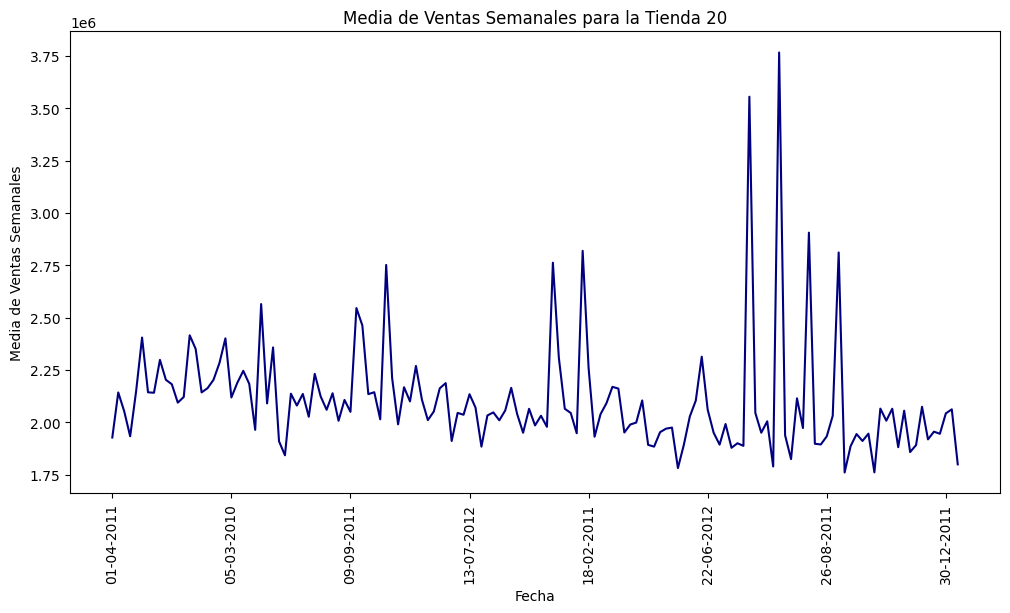

In [46]:
total_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum()

store_max_sales_df = df[df['Store'] == store_max_sales]

weekly_sales_mean_max_store = store_max_sales_df.groupby('Date')['Weekly_Sales'].mean()


plt.figure(figsize=(12, 6))
weekly_sales_mean_max_store.plot(x='Date', y='Weekly_Sales', kind='line', color='navy')
plt.title(f'Media de Ventas Semanales para la Tienda {store_max_sales}')
plt.xlabel('Fecha')
plt.ylabel('Media de Ventas Semanales')
plt.xticks(rotation=90)
plt.show()

En el verano siempre hay muchas mas ventas que en invierno.

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

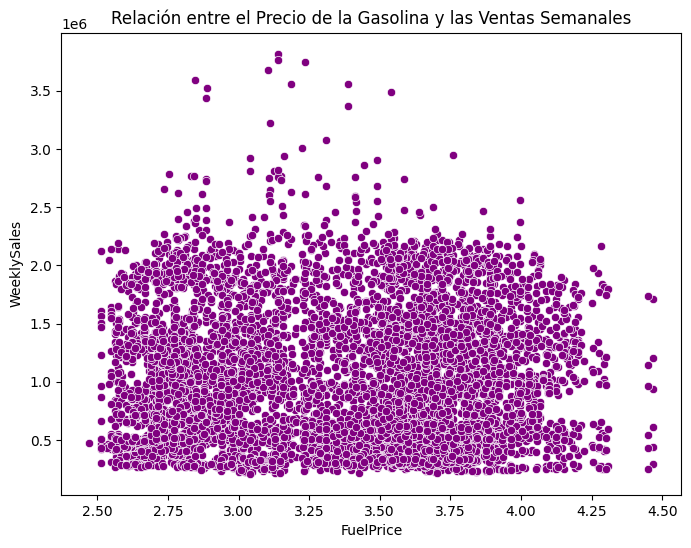

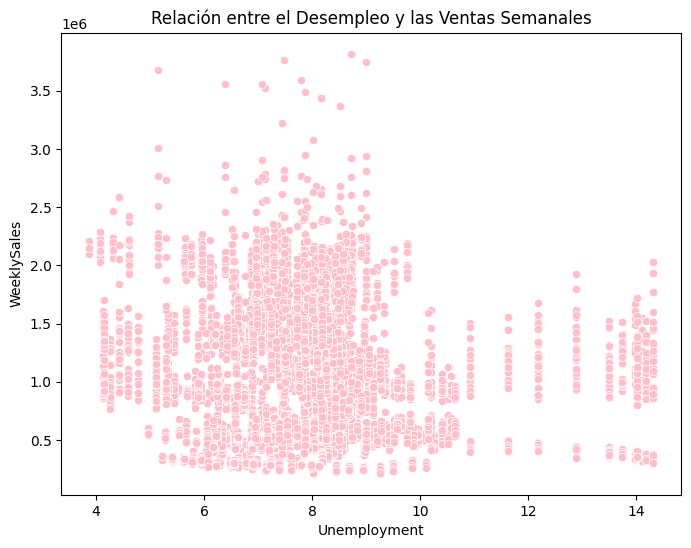

In [55]:
correlation_matrix = df[['Fuel_Price', 'Unemployment', 'Weekly_Sales']].corr()
correlation_matrix

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, color='purple')
plt.title('Relación entre el Precio de la Gasolina y las Ventas Semanales')
plt.xlabel('FuelPrice')
plt.ylabel('WeeklySales')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, color='pink')
plt.title('Relación entre el Desempleo y las Ventas Semanales')
plt.xlabel('Unemployment')
plt.ylabel('WeeklySales')
plt.palette = 'pink'
plt.show()



No, no hay ninguna correlacion significativa en los datos de ambas graficas.

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [64]:
holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

holiday_sales = holiday.mean()
non_holiday_sales = non_holiday.mean()

difference_mean = holiday_sales - non_holiday_sales

print(f"Media de ventas en festivos: {holiday_sales}")
print(f"Media de ventas en no festivos: {non_holiday_sales}")
print(f"Diferencia promedio de ventas entre estos dos tipos de semanas: {difference_mean}")

Media de ventas en festivos: 1122887.8923555557
Media de ventas en no festivos: 1041256.3802088555
Diferencia promedio de ventas entre estos dos tipos de semanas: 81631.51214670017


# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [79]:
median_unemployment = df['Unemployment'].median()

df['Unemployment'].fillna(median_unemployment, inplace=True)

X = df[['Fuel_Price', 'Unemployment', 'CPI', 'Temperature', 'Holiday_Flag']]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-79-f22e53bbbf6a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Unemployment'].fillna(median_unemployment, inplace=True)


In [82]:
lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])

lm = lm.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))

rf = RandomForestRegressor().fit(X_train, y_train)

rf = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("rf", RandomForestRegressor()),
])

rf = rf.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(rf.score(X, y),2)))

y_pred = lm.predict(X_test)

rmse_lm = np.sqrt(mean_squared_error(y_test, y_pred))
mape_lm = mean_absolute_percentage_error(y_test, y_pred)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % rmse_lm)
print("Mean Absolute Percentage Error: %.2f" % (mape_lm*100))

y_pred = rf.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Variance explanation R^2 = 0.03
Variance explanation R^2 = 0.64
Mean squared error: 316554338523.45
Mean absolute error: 475430.77
Coefficient of determination: 0.02
Root Mean Squared Error: 562631.62
Mean Absolute Percentage Error: 67.70
Mean squared error: 287825930618.43
Mean absolute error: 384516.27
Coefficient of determination: 0.11


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


0.64 for linear regression means that approximately 64% of the variance in the target variable can be explained by the independent features in the dataset. This indicates a moderate fit, but there is still a considerable amount of unexplained variance 36%

3% which is for the lm model does not properly represent the data due to the high percentage of unexplained variance.


MSE: average squared differnce between predcited and actual values. Lower the value -> better the performance.
  Lower MSE indicates that the Random Forest Model predcits the median house value with more accuracy.

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

En conclusion, se puede ver claramente que Walmart vende mucho mas en verano que en invierno al igual que en los dias festivos. Factores como el desempleo y la gasolina no tienen realmente mucha influencia en los resultados. Basado en esto, la empresa deberia preparase para vender mucho mas siempre que sea un festivo en verano.